In [3]:
%matplotlib inline


# A demo of the Spectral Co-Clustering algorithm

This example demonstrates how to generate a dataset and bicluster it
using the Spectral Co-Clustering algorithm.

The dataset is generated using the ``make_biclusters`` function, which
creates a matrix of small values and implants bicluster with large
values. The rows and columns are then shuffled and passed to the
Spectral Co-Clustering algorithm. Rearranging the shuffled matrix to
make biclusters contiguous shows how accurately the algorithm found
the biclusters.


In [10]:
a = {'a':3,'b':5}
'c' not in a

True

In [24]:
def create_matrix_data(df):
    sequence = []
    past_tid = None
    curr_tid = None
    num_of_seqs = 0
    map_element_id = 0
    unique_elements = {}
    map_id_to_element = {}
#     f = open("data/real_application/foursquare_NY/fs_ny_week_sequences.dat", "w")
#     f = open(pfile, "w")
    
    for i in tqdm(range(int(len(df))), colour='blue', desc='Processing DataFrame'):
        curr_tid = df.loc[i,"new_tid"]
        index = df.index[df.loc[i,"new_tid"]]
        element = str(df.loc[i,"type"].replace(' ','_'))
        if element not in unique_elements:
                unique_elements.update({element:map_element_id})
                map_id_to_element.update({str(map_element_id):element})
                map_element_id +=1
        
        if index == 0:
            sequence.append(element)
            past_tid = curr_tid
            
        elif curr_tid == past_tid:
            sequence.append(element)
                
        elif curr_tid != past_tid:
            tmp = ' '.join(sequence)
            tmp += '\n'
#             f.write(tmp)
            num_of_seqs += 1
            sequence = []
            sequence.append(element)
            past_tid = curr_tid
        
        if i == (len(df)-1):
            tmp = ' '.join(sequence)
#             f.write(tmp)
            num_of_seqs += 1
            
#     f.close()

    print('Number of sequences: ',num_of_seqs)
    print('Number of columns: ',len(unique_elements))
    
    matrix = np.zeros((num_of_seqs,len(unique_elements)))
    print('Matrix: ',matrix.shape)
    num_of_seqs = 0
    
    for i in tqdm(range(int(len(df))), colour='blue', desc='Populating Matrix'):
        curr_tid = df.loc[i,"new_tid"]
        index = df.index[df.loc[i,"new_tid"]]
        element = str(df.loc[i,"type"].replace(' ','_'))
        
        if index == 0:
            sequence.append(element)
            past_tid = curr_tid
            matrix[num_of_seqs,unique_elements[element]] += 1
            
        elif curr_tid == past_tid:
            sequence.append(element)
            matrix[num_of_seqs,unique_elements[element]] += 1
                
        elif curr_tid != past_tid:
            tmp = ' '.join(sequence)
            tmp += '\n'
#             f.write(tmp)
            matrix[num_of_seqs,unique_elements[element]] += 1
            num_of_seqs += 1
            sequence = []
            sequence.append(element)
            past_tid = curr_tid
        
        if i == (len(df)-1):
            tmp = ' '.join(sequence)
#             f.write(tmp)
            num_of_seqs += 1
    
    print(matrix.sum())
    print("Process completed!")
    return matrix, map_id_to_element

Processing DataFrame:  37%|███████████████████▍                                | 4393/11715 [00:00<00:00, 43792.43it/s]

Automatically created module for IPython interactive environment


Populating Matrix:  33%|██████████████████▏                                    | 3866/11715 [00:00<00:00, 38566.98it/s]

Number of sequences:  352
Number of columns:  310
Matrix:  (352, 310)


Populating Matrix: 100%|██████████████████████████████████████████████████████| 11715/11715 [00:00<00:00, 43461.35it/s]


11715.0
Process completed!
<class 'numpy.ndarray'> (352, 310)
Done in 0.05s.
Row clusters: 10
Column clusters: 10


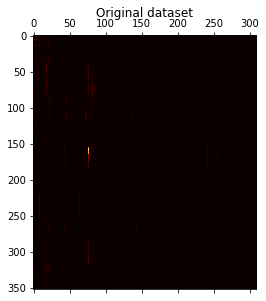

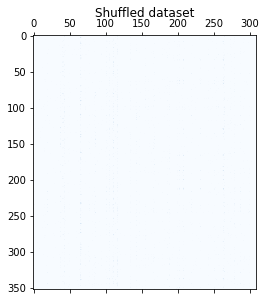

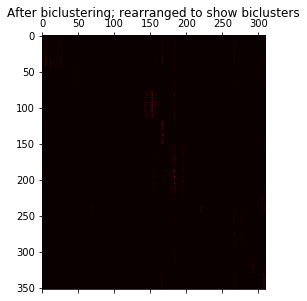

Cluster  0
Number of rows:  43
Elements: Pool, Bank, Doctor's_Office, Automotive_Shop, Salon_/_Barbershop, Bridge, Medical_Center, Electronics_Store, Discount_Store, Hockey_Arena, Wine_Bar, Basketball_Court, Financial_or_Legal_Service, New_American_Restaurant, Tunnel, College_Academic_Building, Salad_Place, Dance_Studio, Pet_Store, Czech_Restaurant, Rest_Area, Bowling_Alley, Snack_Place, Empanada_Restaurant, Scandinavian_Restaurant, Trade_School, Fire_Station, Music_School, 

Cluster  1
Number of rows:  33
Elements: Speakeasy, Music_Venue, Restaurant, Pizza_Place, High_School, Home_(private), Building, Office, Gas_Station, Seafood_Restaurant, Italian_Restaurant, Government_Building, Sports_Bar, Church, Pharmacy, Cafe, Beach, Arts_&_Crafts_Store, Gymnastics_Gym, Animal_Shelter, Music_Store, German_Restaurant, Clothing_Store, Golf_Course, Nightclub, Gourmet_Shop, Dentist's_Office, Supermarket, Gay_Bar, Paper_/_Office_Supplies_Store, Deli_/_Bodega, Miscellaneous_Shop, Southern_/_Soul_Food

In [25]:
print(__doc__)

# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm
from time import time

# from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
# from sklearn.metrics import consensus_score

# data, rows, columns = make_biclusters(
#     shape=(300, 300), n_clusters=5, noise=5,
#     shuffle=False, random_state=0)

k = 10
df_fs_top = pd.read_csv('data/real_application/foursquare_NY/fs_ny_top_users_10.csv', sep=";")
data, map_id_to_element = create_matrix_data(df_fs_top)

print(type(data),data.shape)

# plt.matshow(data, cmap=plt.cm.Blues)
plt.matshow(data, cmap=plt.cm.hot)
plt.title("Original dataset")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

start_time = time()
# model = SpectralCoclustering(n_clusters=193, random_state=0)
model = SpectralCoclustering(n_clusters=10, random_state=0)
model.fit(data)
end_time = time()
print("Done in {:.2f}s.".format(end_time-start_time))

# score = consensus_score(model.biclusters_,
#                         (rows[:, row_idx], columns[:, col_idx]))

# print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]
# print('Row labels: ',len(model.row_labels_))
# print(type(model.row_labels_))
df_r = pd.DataFrame({'row_labels':list(model.row_labels_)})
df_c = pd.DataFrame({'column_labels':list(model.column_labels_)})
print('Row clusters:',df_r['row_labels'].nunique())
print('Column clusters:',df_c['column_labels'].nunique())

plt.matshow(fit_data, cmap=plt.cm.hot)
plt.title("After biclustering; rearranged to show biclusters")
plt.show()

for i in range(k):
    print('Cluster ',i)
#     print(model.get_indices(i))
    print('Number of rows: ',len(model.get_indices(i)[0]))
    print('Elements: ',end='')
    for col in model.get_indices(i)[1]:
        print(map_id_to_element[str(col)],end=", ")
#         print(col, end=", ")
        
    print('\n')